In [85]:
# Brookes Heil Blackburn
# MAT 5990 Spring 2026
# Homework #1 - Question 3

In [86]:
%matplotlib widget
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

   X  Y  z
0 -1  2 -1
1  0  2  1
2  1  2  1
3  2  1 -1
   phi_0  phi_1
0     -1      2
1      0      2
2      1      2
3      2      1
[-0.02702703  0.08108108]
       gval  is_positive
0  0.189189            0
1  0.162162            1
2  0.135135            1
3  0.027027            0


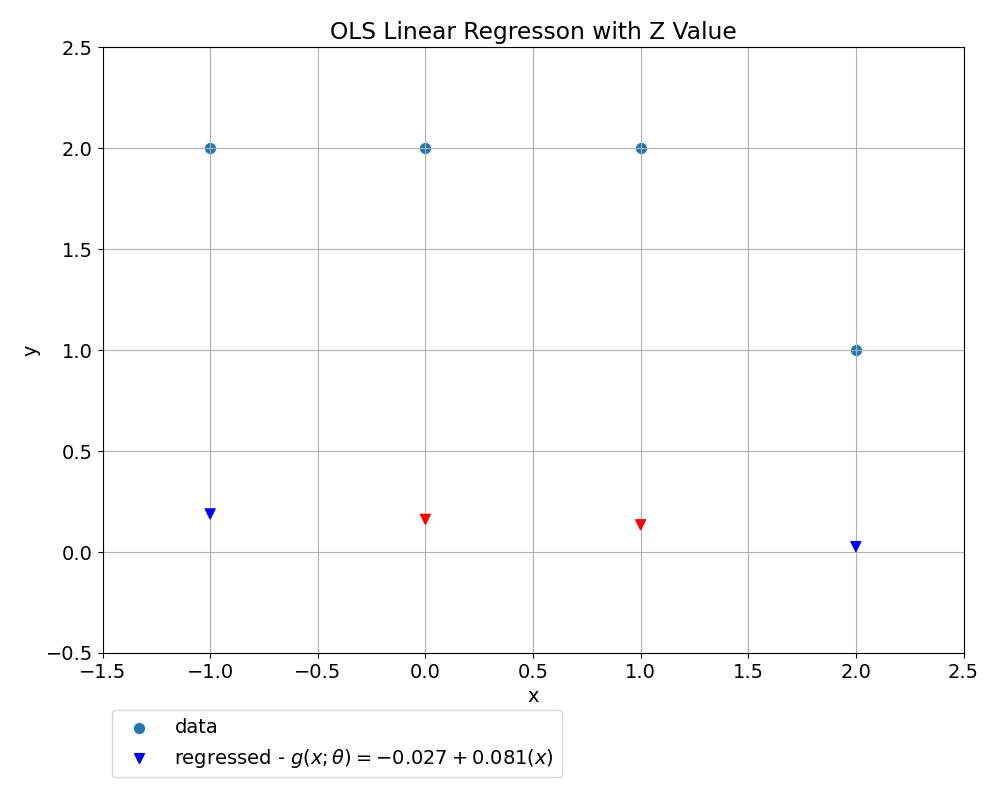

In [87]:
# Adapted from Professor Aminians Code

# note to self: Regression g(x, y) = c_0(x) + c_1(y)
# Phi col n=0 is all of X vector for phi_0 (note just x in this case)
# Phi col n=1 is all of Y vector phi_1 (note just y in this case)

gfuncs = lambda x, y : np.array([
        x,
        y
        ])


# The Data
X = np.array([-1, 0, 1, 2])
Y = np.array([2, 2, 2, 1])
z = np.array([-1, 1, 1, -1])

# I would rather work in data frame 
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'z': z
})
print(df)

# Plug each element of X & Y into each \phi function and create Phi df
Phi_g = pd.DataFrame()
Phi_g['phi_0'] = df['X']
Phi_g['phi_1'] = df['Y']
print(Phi_g)

# Let Python solve for theta in the (\Phi)^T*(\Phi)*(\theta) = (\Phi)^T * y "Normals Equations"
# Theta represents the c_0 and c_1 which are the coefficients on the form

theta_g = np.linalg.lstsq(Phi_g, z)[0]
print(theta_g)

# gvals represent the function output of the g(X, \theta)...the (c_0) and (c_1)
# with least residuals

gvals = Phi_g @ theta_g # matrix-vector product
gvals = pd.DataFrame(gvals)
gvals.columns = ['gval']
gvals['is_positive'] = (df['z'] > 0).astype(int)
# gvals.info()
print(gvals)

## ---------------- Visualiation --------------------------------------------
fig,ax = plt.subplots()

# original data
ax.scatter(X,Y, marker='o', s=50, label='data')

# regression
ax.scatter(X, gvals['gval'], c=gvals['is_positive'],cmap='bwr',marker='v', s=50, label=rf'regressed - $g(x; \theta) = {theta_g[0]: .3f} + {theta_g[1]: .3f}(x)$', zorder=2)

# polish
ax.legend(loc='center left', bbox_to_anchor=(0,-0.15))
ax.set(title='OLS Linear Regresson with Z Value',
       xlabel='x', 
       ylabel='y',
       xlim=(-1.5,2.5),
       ylim=(-0.5,2.5)
      )
ax.grid()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()
plt.savefig(f'MAT5990_HW1_3.jpg')
